In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shashwatwork/consume-complaints-dataset-fo-nlp")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 19.8M/19.8M [00:03<00:00, 6.24MB/s]

Extracting files...


Path to dataset files: C:\Users\udeko\.cache\kagglehub\datasets\shashwatwork\consume-complaints-dataset-fo-nlp\versions\1


In [4]:
import os

# Path to the folder where the dataset was extracted
path = r"C:\Users\udeko\.cache\kagglehub\datasets\shashwatwork\consume-complaints-dataset-fo-nlp\versions\1"

# List all files in that folder
os.listdir(path)


['complaints_processed.csv']

In [5]:
import pandas as pd

# Use the full exact path and filename
df = pd.read_csv(r"C:\Users\udeko\.cache\kagglehub\datasets\shashwatwork\consume-complaints-dataset-fo-nlp\versions\1\complaints_processed.csv")

# Preview the first 5 rows
df.head()


,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [6]:
# Drop the unnecessary index column
df = df.drop(columns=['Unnamed: 0'])

# Remove missing values in narrative column
df = df.dropna(subset=['narrative'])

# Clean whitespace
df['narrative'] = df['narrative'].str.strip()

# Preview cleaned data
df.head()


,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [7]:
!pip install nltk


In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\udeko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udeko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\udeko\AppData\Roaming\nltk_data...


True

In [10]:
import nltk
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\udeko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\udeko\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\udeko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['cleaned_narrative'] = df['narrative'].apply(clean_text)

# Display the first 10 cleaned results
print(df[['product', 'cleaned_narrative']].head(10))


In [ ]:
!pip install openai


In [ ]:
from openai import OpenAI
client = OpenAI()

# Take a sample of 5 complaints
sample_texts = df['cleaned_narrative'].head(5).tolist()

# Combine into one prompt
prompt = "Summarize the main issues and complaint patterns in these texts:\n" + "\n".join(sample_texts)

# Generate the summary
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
)

print("🔍 LLM Summary:")
print(response.choices[0].message.content)


In [ ]:
df.head()


T-Statistic: -23.3376
P-Value: 0.000000
✅ Statistically significant difference — Ad group B outperforms A.


C:\Users\udeko\AppData\Local\Temp\ipykernel_9660\2208355254.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="ad_group", y="CTR", data=ads, palette="coolwarm")


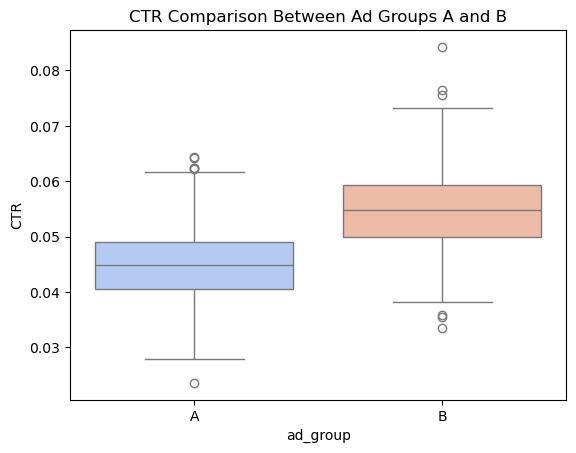

C:\Users\udeko\AppData\Local\Temp\ipykernel_9660\2208355254.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="sentiment_label", y="CTR", data=ads, estimator=np.mean, ci="sd")


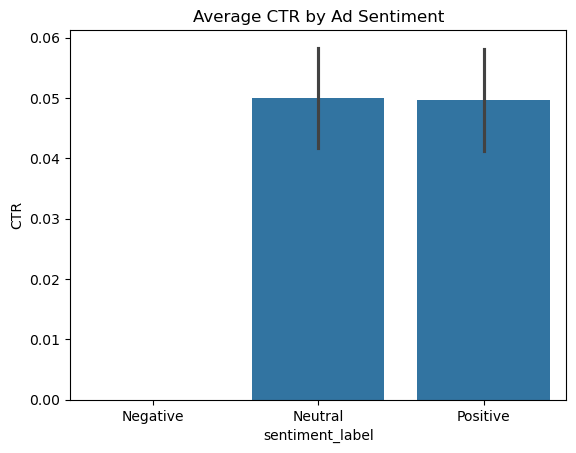

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1. Simulate ad dataset
np.random.seed(42)
n = 1000
ads = pd.DataFrame({
    "ad_id": range(1, n+1),
    "ad_group": np.random.choice(["A", "B"], size=n),
    "ad_text": np.random.choice([
        "Buy now for exclusive discounts!",
        "Limited-time offer for you!",
        "Discover quality you can trust.",
        "Try it today and feel the difference!",
        "Save more on your next purchase."
    ], size=n),
    "impressions": np.random.randint(500, 2000, size=n)
})

# Step 2. Generate clicks with slight CTR uplift for group B
ads["clicks"] = ads.apply(lambda x: np.random.binomial(x.impressions, 0.045 if x.ad_group=="A" else 0.055), axis=1)
ads["CTR"] = ads["clicks"] / ads["impressions"]

# Step 3. Sentiment analysis
ads["sentiment_score"] = ads["ad_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
ads["sentiment_label"] = pd.cut(ads["sentiment_score"], bins=[-1, -0.05, 0.05, 1], labels=["Negative", "Neutral", "Positive"])

# Step 4. Hypothesis testing
groupA = ads.loc[ads.ad_group == "A", "CTR"]
groupB = ads.loc[ads.ad_group == "B", "CTR"]
t_stat, p_value = stats.ttest_ind(groupA, groupB, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.6f}")
if p_value < 0.05:
    print("✅ Statistically significant difference — Ad group B outperforms A.")
else:
    print("❌ No significant difference between groups.")

# Step 5. Visualization
sns.boxplot(x="ad_group", y="CTR", data=ads, palette="coolwarm")
plt.title("CTR Comparison Between Ad Groups A and B")
plt.show()

sns.barplot(x="sentiment_label", y="CTR", data=ads, estimator=np.mean, ci="sd")
plt.title("Average CTR by Ad Sentiment")
plt.show()
